In [1]:
%matplotlib inline
import tensorflow as tf
from my_tf_layer import *
from PIL import Image
import numpy as np

from time import gmtime,strftime


seed = 15  # random seed
random.seed(seed)

nchannel = 1
crop_size = 512
batch = 1

data = tf.placeholder(tf.float32, [batch, crop_size,crop_size,nchannel])
label =  tf.placeholder(tf.int32, [1, crop_size,crop_size])
expected = tf.expand_dims(label, -1)
device = '/gpu:0'

out_size = 64
conv1_1 = conv2d_layer(data,3,out_size,name = 'conv1_1')
conv1_1 = batch_norm_layer(conv1_1,name = 'conv1_1_bn')

out_size = 64
conv1_2 = conv2d_layer(conv1_1,3,out_size,name = 'conv1_2')
conv1_2 = batch_norm_layer(conv1_2,name = 'conv1_2_bn')

out_size = 128
conv1_3 = conv2d_layer(conv1_2,3,out_size,name = 'conv1_3')
conv1_3 = batch_norm_layer(conv1_2,name = 'conv1_3_bn')

# pool1
pool1 = pool_layer(conv1_3,name='pool1')

out_size = 64
conv2_1 = conv2d_layer(pool1,3,out_size,name = 'conv2_1')
conv2_1 = batch_norm_layer(conv2_1,name = 'conv2_1_bn')

out_size = 128
conv2_2 = conv2d_layer(conv2_1,3,out_size,name = 'conv2_2')
conv2_2 = batch_norm_layer(conv2_2,name = 'conv2_2_bn')

out_size = 128
conv2_3 = conv2d_layer(conv2_2,3,out_size,name = 'conv2_3')
conv2_3 = batch_norm_layer(conv2_3,name = 'conv2_3_bn')

pool2 = pool_layer(conv2_3,name='pool2')

out_size = 64
conv3_1 = conv2d_layer(pool2,3,out_size,name = 'conv3_1')
conv3_1 = batch_norm_layer(conv3_1,name = 'conv3_1_bn')

out_size = 128
conv3_2 = conv2d_layer(conv3_1,3,out_size,name = 'conv3_2')
conv3_2 = batch_norm_layer(conv3_2,name = 'conv3_2_bn')

out_size = 128
conv3_3 = conv2d_layer(conv3_2,3,out_size,name = 'conv3_3')
conv3_3 = batch_norm_layer(conv3_3,name = 'conv3_3_bn')

# un pooling layer
un_pool2 = up_pool_deconv_layer(conv3_3,2,name = 'unpool2')

out_size = 64
conv4_1 = conv2d_layer(un_pool2,3,out_size,name = 'conv4_1')
conv4_1 = batch_norm_layer(conv4_1,name = 'conv4_1_bn')

out_size = 128
conv4_2 = conv2d_layer(conv4_1,3,out_size,name = 'conv4_2')
conv4_2 = batch_norm_layer(conv4_2,name = 'conv4_2_bn')

out_size = 128
conv4_3 = conv2d_layer(conv4_2,3,out_size,name = 'conv4_3')
conv4_3 = batch_norm_layer(conv4_3,name = 'conv4_3_bn')

un_pool1 = up_pool_deconv_layer(conv4_3,2,name='unpool1')

out_size = 64
conv5_1 = conv2d_layer(un_pool1,3,out_size,name = 'conv5_1')
conv5_1 = batch_norm_layer(conv5_1,name = 'conv5_1_bn')

out_size = 128
conv5_2 = conv2d_layer(conv5_1,3,out_size,name = 'conv5_2')
conv5_2 = batch_norm_layer(conv5_2,name = 'conv5_2_bn')

out_size = 128
conv5_3 = conv2d_layer(conv5_2,3,out_size,name = 'conv5_3')
conv5_3 = batch_norm_layer(conv5_3,name = 'conv5_3_bn')

out_size = 64
conv5_4 = conv2d_layer(conv5_3,3,out_size,name = 'conv5_4')
conv5_4 = batch_norm_layer(conv5_4,name = 'conv5_4_bn')

classes = 2
score = conv2d_layer(conv5_4,1,classes,name='score')

logits = tf.reshape(score,(-1,2))
print 'loghts size: ',logits.get_shape()


cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf.reshape(expected, [-1]), name='x_entropy')
print 'cross entropy size: ',cross_entropy.get_shape()
loss = tf.reduce_mean(cross_entropy)

rate = 0.0001
optimize = tf.train.AdamOptimizer(rate,0.5).minimize(loss)
#optimize = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
th = 0.5
prediction = tf.argmax(tf.reshape(tf.nn.softmax(logits), tf.shape(score)), dimension=3,name='prediction')
print 'prediction size: ',prediction.get_shape()
accuracy = tf.div(tf.cast(tf.reduce_sum(prediction+tf.cast(label,tf.int64)),tf.float32),tf.cast(crop_size*crop_size,tf.float32))

layer: conv1_1  size: (1, 512, 512, 64)
layer: conv1_2  size: (1, 512, 512, 64)
layer: conv1_3  size: (1, 512, 512, 128)
layer: pool1  size: (1, 256, 256, 64)
layer: conv2_1  size: (1, 256, 256, 64)
layer: conv2_2  size: (1, 256, 256, 128)
layer: conv2_3  size: (1, 256, 256, 128)
layer: pool2  size: (1, 128, 128, 128)
layer: conv3_1  size: (1, 128, 128, 64)
layer: conv3_2  size: (1, 128, 128, 128)
layer: conv3_3  size: (1, 128, 128, 128)
layer: unpool2  size: (1, 256, 256, 128)
layer: conv4_1  size: (1, 256, 256, 64)
layer: conv4_2  size: (1, 256, 256, 128)
layer: conv4_3  size: (1, 256, 256, 128)
layer: unpool1  size: (1, 512, 512, 128)
layer: conv5_1  size: (1, 512, 512, 64)
layer: conv5_2  size: (1, 512, 512, 128)
layer: conv5_3  size: (1, 512, 512, 128)
layer: conv5_4  size: (1, 512, 512, 64)
layer: score  size: (1, 512, 512, 2)
loghts size:  (262144, 2)
cross entropy size:  (262144,)
prediction size:  (1, 512, 512)


In [2]:
train_list = '/home/qinshuo/WorkPlace/caffe_space/seg_spine/spine_list/train_list.txt'
path = '/media/D/SpineDataset/spine_seg'
train_data = []
with open(train_list,'r') as ff:
    for line in ff:
        train_data.append([path+vv for vv in line.split()])
print train_data[0]

#show_image(read_img(train_data[0][0]),read_img(train_data[0][1]))

# enable multiple device
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess = tf.Session()
init = tf.global_variables_initializer()
#init = tf.initialize_all_variables()
sess.run(init)
    
iter = 0
idx = random.randint(0, len(train_data)-1)
batch_xs = read_image(train_data[idx][0],size=crop_size)
batch_ys = read_label(train_data[idx][1],size=crop_size)
sess.run(optimize,feed_dict = {data: batch_xs,label: batch_ys})
print 'step{} -- accuracy is {}'.format(iter,sess.run(accuracy,feed_dict = {data: batch_xs,label: batch_ys}))

['/media/D/SpineDataset/spine_seg/image/AKa21.jpg', '/media/D/SpineDataset/spine_seg/label/AKA2_mask1.png']
step0 -- accuracy is 0.380847930908


243


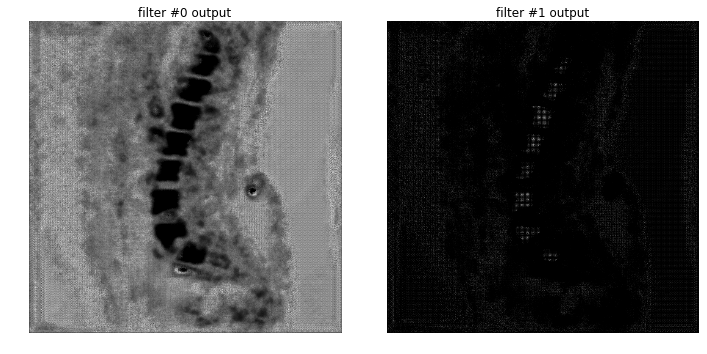

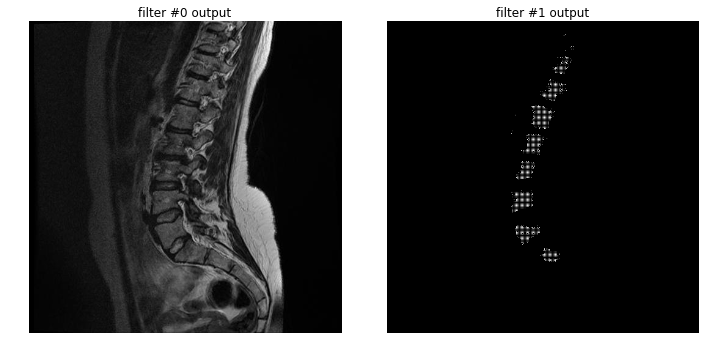

In [14]:
batch_xs = read_image(train_data[10][0],size=crop_size)
layer = np.squeeze(sess.run(score,feed_dict = {data:batch_xs}))
show_image(layer[:,:,0],layer[:,:,1])
show_image(batch_xs,sess.run(prediction,feed_dict = {data:batch_xs}))
print idx

In [9]:
for iter in range(10000):
    idx = random.randint(0, len(train_data)-1)
    rotate = 0  #random.randint(0,360)
    batch_xs = read_image(train_data[idx][0],size=crop_size)
    batch_ys = read_label(train_data[idx][1],size=crop_size)
    sess.run(optimize,feed_dict = {data: batch_xs,label: batch_ys})
    if (iter+1)%200 == 0:
        print '{}-step{} -- accuracy is {}'.format(strftime("%a, %d %b %Y %H:%M:%S", gmtime()),iter+1,sess.run(accuracy,feed_dict = {data: batch_xs,label: batch_ys}))
    if (iter+1)%2500 == 0:
        save_path = strftime("checkpoint/%H-%M-%S.ckpt",gmtime())
        saver = tf.train.Saver()
        save_path = saver.save(sess,save_path)
        print("Model saved in file: %s" % save_path)
        ss = prediction.eval(session = sess,feed_dict = {data: batch_xs,label: batch_ys})
        ss2 = ss.reshape(-1,crop_size,crop_size)
        #show_image(ss2[0],batch_ys)
print "iteration done!"

Tue, 17 Jan 2017 03:09:00-step200 -- accuracy is 0.153308868408
Tue, 17 Jan 2017 03:13:44-step400 -- accuracy is 0.0590362548828
Tue, 17 Jan 2017 03:18:27-step600 -- accuracy is 0.0507888793945
Tue, 17 Jan 2017 03:23:10-step800 -- accuracy is 0.0422554016113
Tue, 17 Jan 2017 03:27:54-step1000 -- accuracy is 0.0313301086426
Tue, 17 Jan 2017 03:32:37-step1200 -- accuracy is 0.0312080383301
Tue, 17 Jan 2017 03:37:21-step1400 -- accuracy is 0.0207633972168
Tue, 17 Jan 2017 03:42:04-step1600 -- accuracy is 0.035343170166
Tue, 17 Jan 2017 03:46:48-step1800 -- accuracy is 0.0308723449707
Tue, 17 Jan 2017 03:51:31-step2000 -- accuracy is 0.0205497741699
Tue, 17 Jan 2017 03:56:15-step2200 -- accuracy is 0.00299835205078
Tue, 17 Jan 2017 04:00:58-step2400 -- accuracy is 0.0543785095215
Model saved in file: checkpoint/04-03-20.ckpt
Tue, 17 Jan 2017 04:05:50-step2600 -- accuracy is 0.0322303771973
Tue, 17 Jan 2017 04:10:33-step2800 -- accuracy is 0.0500679016113
Tue, 17 Jan 2017 04:15:16-step3000 

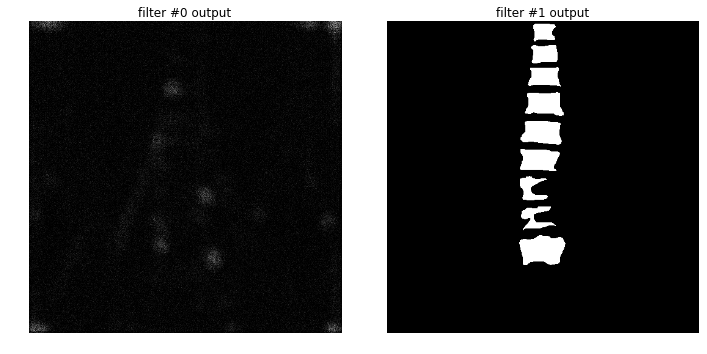

In [15]:
ss = score.eval(session = sess,feed_dict = {data: batch_xs,label: batch_ys})
ss = np.squeeze(ss)
show_image(ss[:,:,0],batch_ys)